In [5]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import time
from datetime import timedelta
import plotly.graph_objects as go
from fbprophet import Prophet
from fbprophet.plot import plot_plotly

In [6]:
usdi = ("DX-Y.NYB", ) #
eur = ('EURUSD=X') #
gold = ('GC=F') #
dji = ('^DJI') #


ticker = [usdi, eur, gold, dji]

#### US Index DF

In [8]:
# Do not rerun

usdf = yf.download(usdi, period = '15y')
usdf =  usdf[['Close']]/100


usdf.rename(columns = {'Close':'US Close'}, inplace = True)
usdf.head()

[*********************100%***********************]  1 of 1 completed


,US Close
Date,
2006-08-14,0.8564
2006-08-15,0.8522
2006-08-16,0.8488
2006-08-17,0.8504
2006-08-18,0.8509


#### EUR DF

In [5]:
# Do not rerun

eurdf = yf.download(eur, period = '15y')
eurdf =  eurdf[['Close']]


eurdf.rename(columns = {'Close':'EUR Close'}, inplace = True)
eurdf.head()

[*********************100%***********************]  1 of 1 completed


/Users/rogermac/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:5034: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


,EUR Close
Date,
2006-08-10,1.279296
2006-08-11,1.272508
2006-08-14,1.272297
2006-08-15,1.279100
2006-08-16,1.284307


#### Gold DF

In [6]:
# Do not rerun

gdf = yf.download(gold, period = '15y')
gdf =  gdf[['Close']]


gdf.rename(columns = {'Close':'Gold Close'}, inplace = True)
gdf.head()

[*********************100%***********************]  1 of 1 completed


/Users/rogermac/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:5034: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


,Gold Close
Date,
2006-08-10,634.900024
2006-08-11,633.500000
2006-08-14,628.500000
2006-08-15,622.500000
2006-08-16,628.700012


#### Dow Jones DF

In [7]:
# Do not rerun

djdf = yf.download(dji, period = '15y')
djdf =  djdf[['Close']]


djdf.rename(columns = {'Close':'DJ Close'}, inplace = True)
djdf.head()

[*********************100%***********************]  1 of 1 completed


/Users/rogermac/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:5034: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


,DJ Close
Date,
2006-08-10,11124.370117
2006-08-11,11088.030273
2006-08-14,11097.870117
2006-08-15,11230.259766
2006-08-16,11327.120117


### Concatenating All Currencies into 1 DataFrame

In [8]:
edf = pd.concat((usdf, eurdf, gdf, djdf), axis=1)
edf.dropna(inplace = True)
edf.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3691 entries, 2006-08-10 to 2021-08-09
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   US Close    3691 non-null   float64
 1   EUR Close   3691 non-null   float64
 2   Gold Close  3691 non-null   float64
 3   DJ Close    3691 non-null   float64
dtypes: float64(4)
memory usage: 144.2 KB


In [9]:
edf.head()

,US Close,EUR Close,Gold Close,DJ Close
Date,,,,
2006-08-10,85.080002,1.279296,634.900024,11124.370117
2006-08-11,85.519997,1.272508,633.500000,11088.030273
2006-08-14,85.639999,1.272297,628.500000,11097.870117
2006-08-15,85.220001,1.279100,622.500000,11230.259766
2006-08-16,84.879997,1.284307,628.700012,11327.120117


### TO CSV

In [82]:
edf.to_csv('eco_df.csv')

In [83]:
edf.head()

,US Close,EUR Close,Gold Close,DJ Close
Date,,,,
2006-08-10,85.080002,1.279296,634.900024,11124.370117
2006-08-11,85.519997,1.272508,633.500000,11088.030273
2006-08-14,85.639999,1.272297,628.500000,11097.870117
2006-08-15,85.220001,1.279100,622.500000,11230.259766
2006-08-16,84.879997,1.284307,628.700012,11327.120117


In [14]:
fdf = pd.read_csv('us_eco_factors.csv')
fdf.head(20)

,date,cpi,gdp,ffr,debt
0,2006,2.54,2.86,5.25,8.6
1,2007,4.08,1.88,4.25,9.0
2,2008,0.09,-0.14,0.25,10.0
3,2009,2.72,-2.54,0.25,11.9
4,2010,1.50,2.56,0.25,13.6
5,2011,2.96,1.55,0.25,14.8
6,2012,1.74,2.25,0.25,16.0
7,2013,1.50,1.84,0.25,16.7
8,2014,0.76,2.53,0.25,17.8
9,2015,0.73,3.08,0.50,18.2


In [26]:
date_df=pd.date_range(start='2006-08-10', end='2023-12-31', freq='D')
date_df = pd.DataFrame(date_df)

In [29]:
date_df['date_daily'] = date_df

In [31]:
del date_df[0]

In [32]:
date_df.head()

,date_daily
0,2006-08-01
1,2006-08-02
2,2006-08-03
3,2006-08-04
4,2006-08-05


In [44]:
y06 = pd.date_range(start='2006-08-01', end='2006-12-31', freq='D')
y07 = pd.date_range(start='2007-01-01', end='2007-12-31', freq='D')
y08 = pd.date_range(start='2008-01-01', end='2008-12-31', freq='D')
y09 = pd.date_range(start='2009-01-01', end='2009-12-31', freq='D')
y10 = pd.date_range(start='2010-01-01', end='2010-12-31', freq='D')
y11 = pd.date_range(start='2011-01-01', end='2011-12-31', freq='D')
y12 = pd.date_range(start='2012-01-01', end='2012-12-31', freq='D')
y13 = pd.date_range(start='2013-01-01', end='2013-12-31', freq='D')
y14 = pd.date_range(start='2014-01-01', end='2014-12-31', freq='D')
y15 = pd.date_range(start='2015-01-01', end='2015-12-31', freq='D')
y16 = pd.date_range(start='2016-01-01', end='2016-12-31', freq='D')
y17 = pd.date_range(start='2017-01-01', end='2017-12-31', freq='D')
y18 = pd.date_range(start='2018-01-01', end='2018-12-31', freq='D')
y19 = pd.date_range(start='2019-01-01', end='2019-12-31', freq='D')
y20 = pd.date_range(start='2020-01-01', end='2020-12-31', freq='D')
y21 = pd.date_range(start='2021-01-01', end='2021-12-31', freq='D')
y22 = pd.date_range(start='2022-01-01', end='2022-12-31', freq='D')
y23 = pd.date_range(start='2023-01-01', end='2023-12-31', freq='D')

In [49]:
y06_df = pd.DataFrame(y06)
y06_df['cpi'] = fdf['cpi'][0]
y06_df['gdp'] = fdf['gdp'][0]
y06_df['ffr'] = fdf['ffr'][0]
y06_df['debt'] = fdf['debt'][0]

In [54]:
y07_df = pd.DataFrame(y07)
y07_df['cpi'] = fdf['cpi'][1]
y07_df['gdp'] = fdf['gdp'][1]
y07_df['ffr'] = fdf['ffr'][1]
y07_df['debt'] = fdf['debt'][1]

In [56]:
y08_df = pd.DataFrame(y08)
y08_df['cpi'] = fdf['cpi'][2]
y08_df['gdp'] = fdf['gdp'][2]
y08_df['ffr'] = fdf['ffr'][2]
y08_df['debt'] = fdf['debt'][2]

In [57]:
y09_df = pd.DataFrame(y09)
y09_df['cpi'] = fdf['cpi'][3]
y09_df['gdp'] = fdf['gdp'][3]
y09_df['ffr'] = fdf['ffr'][3]
y09_df['debt'] = fdf['debt'][3]

In [58]:
y10_df = pd.DataFrame(y10)
y10_df['cpi'] = fdf['cpi'][4]
y10_df['gdp'] = fdf['gdp'][4]
y10_df['ffr'] = fdf['ffr'][4]
y10_df['debt'] = fdf['debt'][4]

In [59]:
y11_df = pd.DataFrame(y11)
y11_df['cpi'] = fdf['cpi'][5]
y11_df['gdp'] = fdf['gdp'][5]
y11_df['ffr'] = fdf['ffr'][5]
y11_df['debt'] = fdf['debt'][5]

In [60]:
y12_df = pd.DataFrame(y12)
y12_df['cpi'] = fdf['cpi'][6]
y12_df['gdp'] = fdf['gdp'][6]
y12_df['ffr'] = fdf['ffr'][6]
y12_df['debt'] = fdf['debt'][6]

In [61]:
y13_df = pd.DataFrame(y13)
y13_df['cpi'] = fdf['cpi'][7]
y13_df['gdp'] = fdf['gdp'][7]
y13_df['ffr'] = fdf['ffr'][7]
y13_df['debt'] = fdf['debt'][7]

In [62]:
y14_df = pd.DataFrame(y14)
y14_df['cpi'] = fdf['cpi'][8]
y14_df['gdp'] = fdf['gdp'][8]
y14_df['ffr'] = fdf['ffr'][8]
y14_df['debt'] = fdf['debt'][8]

In [63]:
y15_df = pd.DataFrame(y15)
y15_df['cpi'] = fdf['cpi'][9]
y15_df['gdp'] = fdf['gdp'][9]
y15_df['ffr'] = fdf['ffr'][9]
y15_df['debt'] = fdf['debt'][9]

In [64]:
y16_df = pd.DataFrame(y16)
y16_df['cpi'] = fdf['cpi'][10]
y16_df['gdp'] = fdf['gdp'][10]
y16_df['ffr'] = fdf['ffr'][10]
y16_df['debt'] = fdf['debt'][10]

In [65]:
y17_df = pd.DataFrame(y17)
y17_df['cpi'] = fdf['cpi'][11]
y17_df['gdp'] = fdf['gdp'][11]
y17_df['ffr'] = fdf['ffr'][11]
y17_df['debt'] = fdf['debt'][11]

In [66]:
y18_df = pd.DataFrame(y18)
y18_df['cpi'] = fdf['cpi'][12]
y18_df['gdp'] = fdf['gdp'][12]
y18_df['ffr'] = fdf['ffr'][12]
y18_df['debt'] = fdf['debt'][12]

In [67]:
y19_df = pd.DataFrame(y19)
y19_df['cpi'] = fdf['cpi'][13]
y19_df['gdp'] = fdf['gdp'][13]
y19_df['ffr'] = fdf['ffr'][13]
y19_df['debt'] = fdf['debt'][13]

In [68]:
y20_df = pd.DataFrame(y20)
y20_df['cpi'] = fdf['cpi'][14]
y20_df['gdp'] = fdf['gdp'][14]
y20_df['ffr'] = fdf['ffr'][14]
y20_df['debt'] = fdf['debt'][14]

In [69]:
y21_df = pd.DataFrame(y21)
y21_df['cpi'] = fdf['cpi'][15]
y21_df['gdp'] = fdf['gdp'][15]
y21_df['ffr'] = fdf['ffr'][15]
y21_df['debt'] = fdf['debt'][15]

In [70]:
y22_df = pd.DataFrame(y22)
y22_df['cpi'] = fdf['cpi'][16]
y22_df['gdp'] = fdf['gdp'][16]
y22_df['ffr'] = fdf['ffr'][16]
y22_df['debt'] = fdf['debt'][16]

In [71]:
y23_df = pd.DataFrame(y23)
y23_df['cpi'] = fdf['cpi'][17]
y23_df['gdp'] = fdf['gdp'][17]
y23_df['ffr'] = fdf['ffr'][17]
y23_df['debt'] = fdf['debt'][17]

In [76]:
xf_df = pd.concat([y06_df, y07_df, y08_df, y09_df, y10_df, y11_df, y12_df, y13_df, y14_df, y15_df, y16_df, y17_df, y18_df, y19_df, y20_df, y21_df, y22_df,y23_df], axis=0) 

In [ ]:
# concatenating df1 and df2 along rows
vertical_concat = pd.concat([df1, df2], axis=0)

In [77]:
xf_df.tail()

,0,cpi,gdp,ffr,debt
360,2023-12-27,20.0,2.4,0.25,30.8
361,2023-12-28,20.0,2.4,0.25,30.8
362,2023-12-29,20.0,2.4,0.25,30.8
363,2023-12-30,20.0,2.4,0.25,30.8
364,2023-12-31,20.0,2.4,0.25,30.8


In [37]:
date_df.info

<bound method DataFrame.info of      date_daily
0    2006-08-01
1    2006-08-02
2    2006-08-03
3    2006-08-04
4    2006-08-05
...         ...
6357 2023-12-27
6358 2023-12-28
6359 2023-12-29
6360 2023-12-30
6361 2023-12-31

[6362 rows x 1 columns]>

In [79]:
edf.to_csv('eco_df.csv')

In [81]:
xf_df.to_csv('4_x_var.csv')

In [4]:
edf.head()

NameError: name 'edf' is not defined

In [222]:
gdf = edf[['Gold Close']]
gdf.head()

,Gold Close
Date,
2006-08-10,634.900024
2006-08-11,633.500000
2006-08-14,628.500000
2006-08-15,622.500000
2006-08-16,628.700012


In [223]:
gdf.tail()

,Gold Close
Date,
2021-08-03,1810.099976
2021-08-04,1810.500000
2021-08-05,1805.099976
2021-08-06,1760.000000
2021-08-09,1723.400024


In [224]:
gdf.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3691 entries, 2006-08-10 to 2021-08-09
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Gold Close  3691 non-null   float64
dtypes: float64(1)
memory usage: 57.7 KB


In [13]:
# Load specific forecasting tools
from statsmodels.tsa.statespace.sarimax import SARIMAX

from statsmodels.graphics.tsaplots import plot_acf,plot_pacf # for determining (p,q) orders
from statsmodels.tsa.seasonal import seasonal_decompose      # for ETS Plots

# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")


In [14]:
# Setup
from datetime import datetime
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
import sys, os



import warnings
warnings.simplefilter(action='ignore')
import fbprophet
import pmdarima as pm

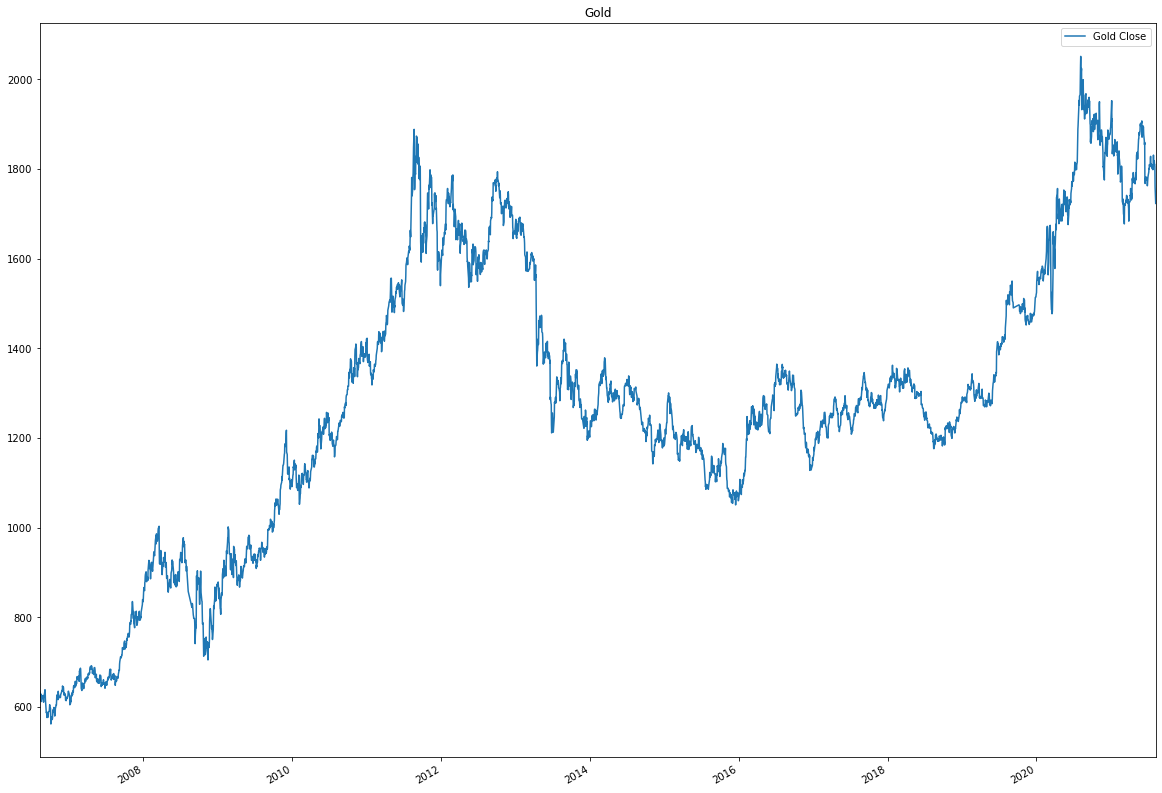

In [225]:
title = 'Gold'
ylabel=''
xlabel='' # we don't really need a label here

ax = gdf.plot(figsize=(20,15),title=title)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel);

In [16]:
title = 'USD Index'
ylabel=''
xlabel='' # we don't really need a label here

ax = usdf['US Close'].plot(figsize=(20,15),title=title)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel);

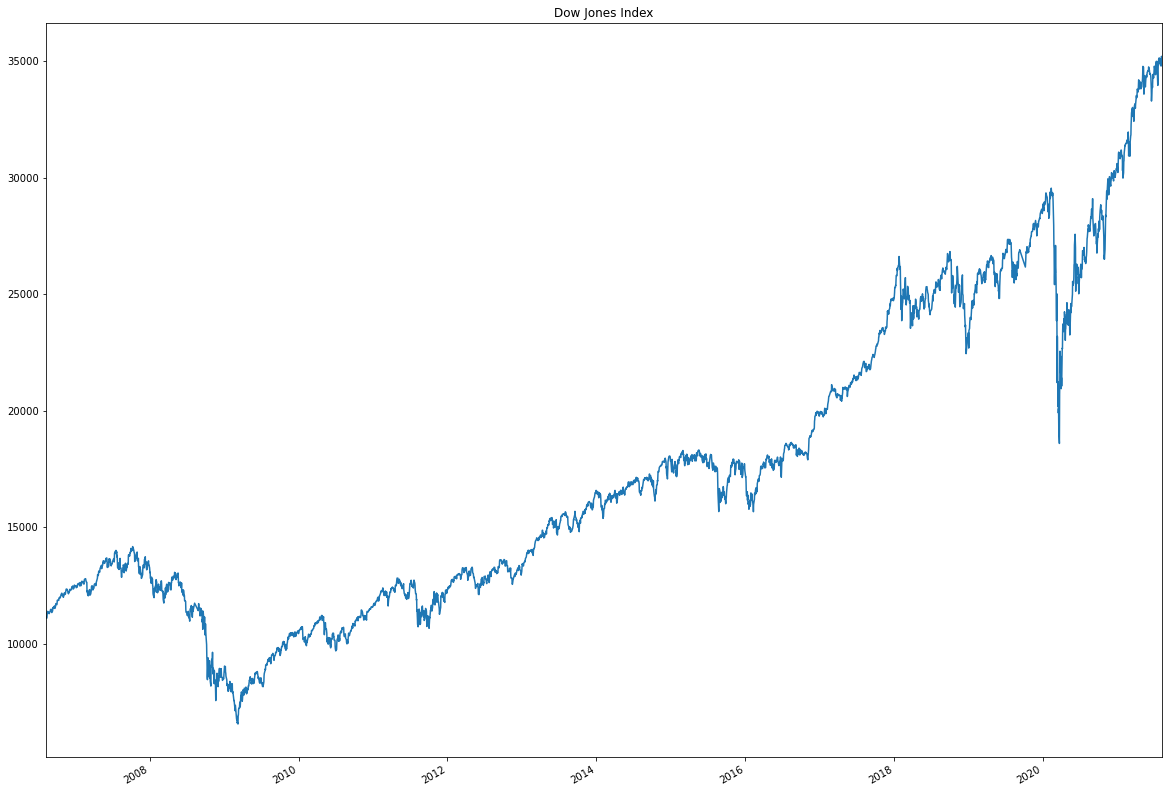

In [109]:
title = 'Dow Jones Index'
ylabel=''
xlabel='' # we don't really need a label here

ax = edf['DJ Close'].plot(figsize=(20,15),title=title)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel);

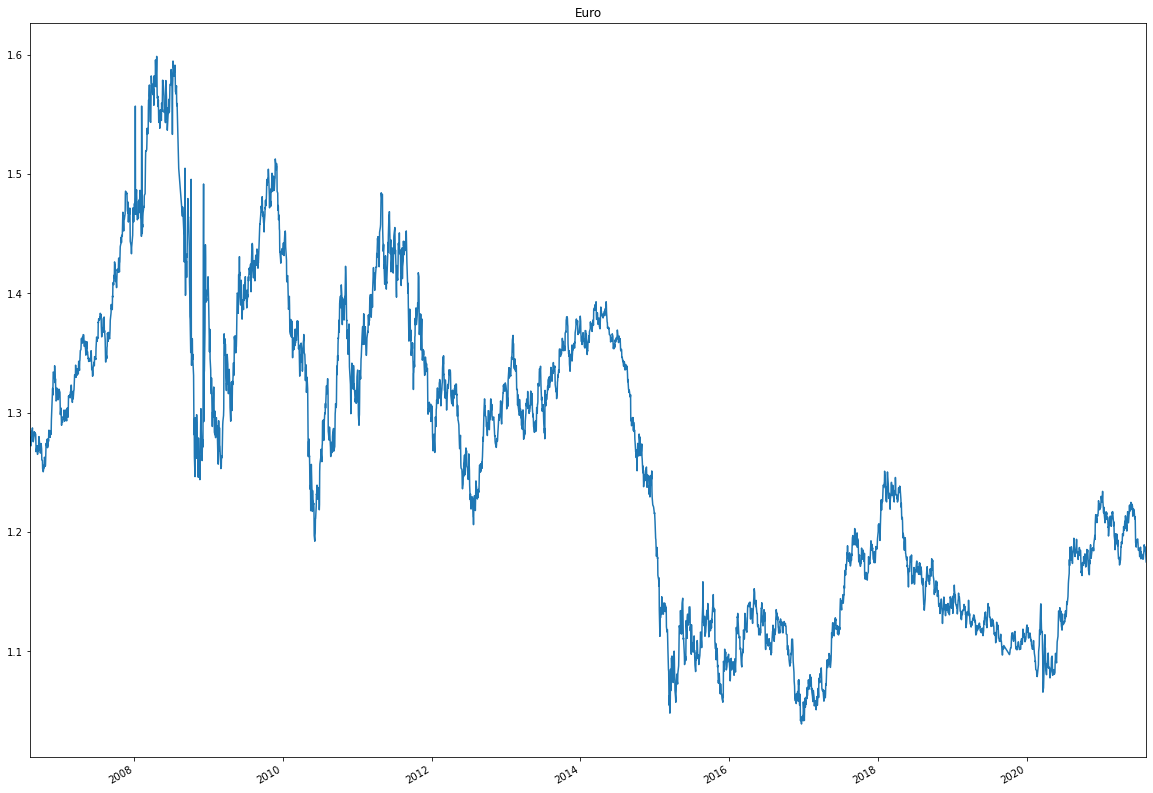

In [111]:
title = 'Euro'
ylabel=''
xlabel='' # we don't really need a label here

ax = edf['EUR Close'].plot(figsize=(20,15),title=title)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel);

In [100]:
edf.corr()

,US Close,EUR Close,Gold Close,DJ Close
US Close,1.000000,-0.966586,0.176932,0.700602
EUR Close,-0.966586,1.000000,-0.286075,-0.648228
Gold Close,0.176932,-0.286075,1.000000,0.507017
DJ Close,0.700602,-0.648228,0.507017,1.000000


In [113]:
# For SARIMA Orders we set seasonal=True and pass in an m value
auto_arima(edf['Gold Close'],seasonal=True,m=7).summary()

NameError: name 'auto_arima' is not defined

In [227]:
# Set four weeks for testing
train = gdf.iloc[:3300]
test = gdf.iloc[3300:]

In [228]:
model = SARIMAX(train['Gold Close'],order=(1,0,0), 
                                seasonal_order=(0,1,1,12),enforce_invertibility=False)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                           Gold Close   No. Observations:                 3300
Model:             SARIMAX(1, 0, 0)x(0, 1, [1], 12)   Log Likelihood              -13294.280
Date:                              Tue, 10 Aug 2021   AIC                          26594.559
Time:                                      18:51:00   BIC                          26612.853
Sample:                                           0   HQIC                         26601.109
                                             - 3300                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.0000      0.002    438.168      0.000       0.996       1.004
ma.S.L12      -1.0003      0.119     -8.407      0.000      -1.234      -0.767
sigma2       186.5772     23.088      8.081      0.000     141.325     231.830
===================================================================================
Ljung-Box (L1) (Q):                    nan   Jarque-Bera (JB):             10166.75
Prob(Q):                               nan   Prob(JB):                         0.00
Heteroskedasticity (H):               0.65   Skew:                            -0.79
Prob(H) (two-sided):                  0.00   Kurtosis:                        11.47
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [229]:
# Obtain predicted values
start=len(train)
end=len(train)+len(test)-1
predictions = results.predict(start=start, end=end, dynamic=False).rename('SARIMA(1,0,0)(2,0,0,7) Predictions')

In [ ]:
# plot predictions
pd.plotting.register_matplotlib_converters()

#use model.predict() start and end in relation to series
monthly_temp['forecast'] = sar.predict()  
monthly_temp[730:][['temp', 'forecast']].plot();

In [ ]:
# plot predictions
pd.plotting.register_matplotlib_converters()
#use model.predict() start and end in relation to series
monthly_temp['forecast'] = sar.predict(start = 750, end= 790)  
monthly_temp[730:][['temp', 'forecast']].plot();

[Text(0.5, 0, ''), Text(0, 0.5, '')]

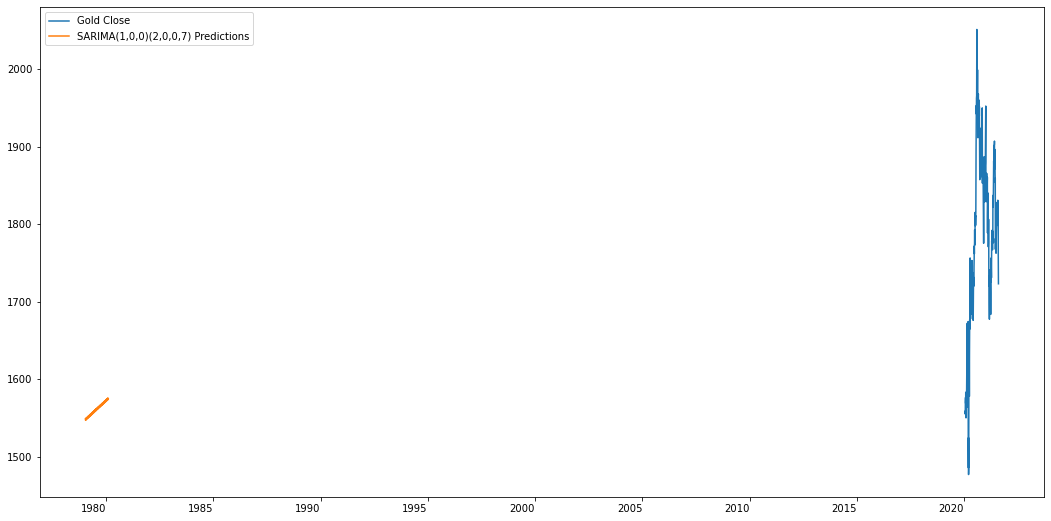

In [230]:
# Plot predictions against known values
title=''
ylabel=''
xlabel=''

ax = test['Gold Close'].plot(legend=True,figsize=(18,10),title=title)
predictions.plot(legend=True)

ax.set(xlabel=xlabel, ylabel=ylabel)

In [139]:
from statsmodels.tools.eval_measures import mse,rmse

error1 = mse(test['Gold Close'], predictions)
error2 = rmse(test['Gold Close'], predictions)

print(f'SARIMA(1,0,0)(2,0,0,7) MSE Error: {error1:11.10}')
print(f'SARIMA(1,0,0)(2,0,0,7) RMSE Error: {error2:11.10}')

SARIMA(1,0,0)(2,0,0,7) MSE Error: 6042.295516
SARIMA(1,0,0)(2,0,0,7) RMSE Error: 77.73220385


In [144]:
from datetime import date

import yfinance as yf
from fbprophet import Prophet
from fbprophet.plot import plot_plotly
from plotly import graph_objs as go

START = "2006-08-10"
TODAY = "2021-08-06"



stocks = ("GC=F")



period = 3 * 365


def load_data(ticker):
    data = yf.download(ticker, START, TODAY)
    data.reset_index(inplace=True)
    return data


data = load_data(stocks)


[*********************100%***********************]  1 of 1 completed


In [147]:
def plot_raw_data():
    fig = go.Figure()

    fig.add_trace(go.Scatter(x=data['Date'], y=data['Close'], name='stock_close'))
    fig.layout.update(title_text='Time Series Data', xaxis_rangeslider_visible=True)
    fig.show()
plot_raw_data()



INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


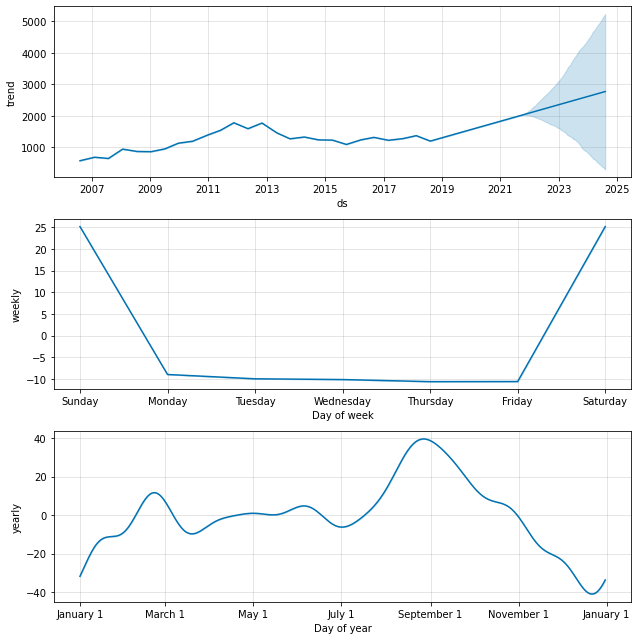

In [217]:
#Forecasting
df_train = data[['Date', 'Close']]
df_train = df_train.rename(columns={'Date': 'ds', 'Close':'y'})

changepoint_prior_scale = 2
seasonality_prior_scale = 5

m = Prophet(seasonality_prior_scale=seasonality_prior_scale,changepoint_prior_scale=changepoint_prior_scale)

m.fit(df_train)
future = m.make_future_dataframe(periods=period)
forecast = m.predict(future)




fig1 = plot_plotly(m, forecast)
fig1.show()



fig2 = m.plot_components(forecast)

fig2.show()

In [218]:
import numpy as np
se = np.square(forecast.loc[:, 'yhat'] - data['Close'])
mse = np.mean(se)
rmse = (np.sqrt(mse)).round(3)
print('Gold RMSE:' + f' {rmse}')

Gold RMSE: 56.324


Gold RMSE: 56.324
    
changepoint_prior_scale = 2
seasonality_prior_scale = 5

In [ ]:
from datetime import date

import yfinance as yf
from fbprophet import Prophet
from fbprophet.plot import plot_plotly
from plotly import graph_objs as go

START = "2006-08-10"
TODAY = "2021-08-06"



stocks = ("GC=F"")



period = n_years * 365


def load_data(ticker):
    data = yf.download(ticker, START, TODAY)
    data.reset_index(inplace=True)
    return data

data_load_state = st.text("Load data...")
data = load_data(selected_stock)
data_load_state.text("Loading data...done")



def plot_raw_data():
    fig = go.Figure()
    fig.add_trace(go.Scatter(x=data['Date'], y=data['Open'], name='stock_open'))
    fig.add_trace(go.Scatter(x=data['Date'], y=data['Close'], name='stock_close'))
    fig.layout.update(title_text='Time Series Data', xaxis_rangeslider_visible=True)
    plotly_chart(fig)

plot_raw_data()

#Forecasting
df_train = data[['Date', 'Close']]
df_train = df_train.rename(columns={'Date': 'ds', 'Close':'y'})

changepoint_prior_scale = 0.02
seasonality_prior_scale = 10

m = Prophet(seasonality_prior_scale=seasonality_prior_scale,changepoint_prior_scale=changepoint_prior_scale)

m.fit(df_train)
future = m.make_future_dataframe(periods=period)
forecast = m.predict(future)

st.subheader('Forecast Data')
st.write(forecast.tail())

st.write('Forecast Data')
fig1 = plot_plotly(m, forecast)
st.plotly_chart(fig1)

st.write('FBProphet Forecast Components')

fig2 = m.plot_components(forecast)

st.write(fig2)